In [1]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


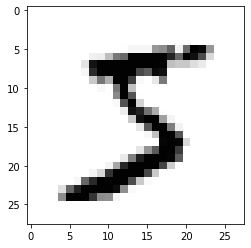

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [3]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [4]:
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64') / 255

In [23]:
X_train.shape,X_test.shape

((60000, 784), (10000, 28, 28))

In [21]:
import tensorflow as tf

Y_train = tf.keras.utils.to_categorical(Y_class_train)
Y_test = tf.keras.utils.to_categorical(Y_class_test)

In [24]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os 
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
model = Sequential([
                    Dense(512,input_dim=784,activation='relu'),
                    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam'
)

In [10]:
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=10)

In [12]:
history = model.fit(X_train,Y_train,validation_split=0.2,verbose=0,
                    epochs=30,batch_size=200,
                    callbacks=[checkpointer,early_stopping])


Epoch 00001: val_loss improved from inf to 1.15039, saving model to ./model/best001-1.1504.hdf5

Epoch 00002: val_loss improved from 1.15039 to 0.63425, saving model to ./model/best002-0.6343.hdf5

Epoch 00003: val_loss improved from 0.63425 to 0.46871, saving model to ./model/best003-0.4687.hdf5

Epoch 00004: val_loss improved from 0.46871 to 0.39627, saving model to ./model/best004-0.3963.hdf5

Epoch 00005: val_loss improved from 0.39627 to 0.35927, saving model to ./model/best005-0.3593.hdf5

Epoch 00006: val_loss improved from 0.35927 to 0.33610, saving model to ./model/best006-0.3361.hdf5

Epoch 00007: val_loss improved from 0.33610 to 0.31540, saving model to ./model/best007-0.3154.hdf5

Epoch 00008: val_loss improved from 0.31540 to 0.30175, saving model to ./model/best008-0.3017.hdf5

Epoch 00009: val_loss improved from 0.30175 to 0.29385, saving model to ./model/best009-0.2939.hdf5

Epoch 00010: val_loss improved from 0.29385 to 0.28269, saving model to ./model/best010-0.2827

In [25]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best030-0.1817.hdf5')
acc = best_model.evaluate(X_test, Y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 20.6124 - accuracy: 0.9323
Accuracy: 0.9323


In [26]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

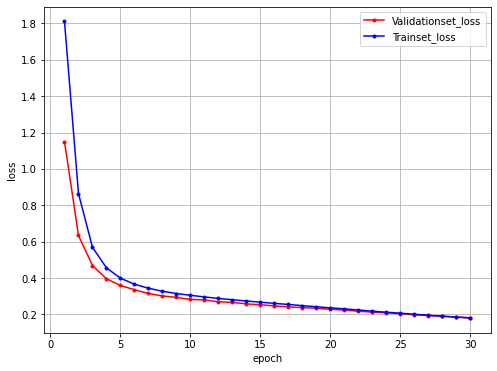

In [28]:
import numpy as np

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()